### Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data summary

We downloaded our dataset from https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification.
This is an extension to the GTZAN dataset, which is the most famous dataset for audio-related ML tasks. It is to music what MNIST is to OCR. It was originally created by George Tzanetakis in 2002 and can be found at http://marsyas.info/downloads/datasets.html, although it seems the link is dead at the time of creating this notebook.

The original GTZAN dataset is comprised under the `genres_original` directory. It contains 30-sec long audio files distributed among 10 different music genres, being

- Blues
- Classical
- Country
- Disco
- Hip-Hop
- Jazz
- Metal
- Reggae
- Rock
  
each associated with 100 audio files. The audio files are encoded into the `.wav` format which is a common format for uncompressed, raw, audio.

The extension of the dataset related to the aforementioned Kaggle page involves the addition of 2 csv files,

- `features_3_sec.csv`
- `features_30_sec.csv`

containing hand-crafted features (or summary statistics) for each audio files. *For explanations on what these statistics are and what they represent, refer to the corresponding section of the notebook.* The first CSV associates each 30-sec long audio to its statistics while in the second file, the statistics are computed on 10, 3-sec long, extracts from each audio file, thus increasing the number of samples by a factor of 10. However, it could be argued that a 3-sec extract of a song might sometimes be too short to properly identify the genre it belongs to.

Additionally, the authors of the Kaggle dataset added a directory, `images_original` containing the spectrogram visualizations for each original audio file. *Refer to this notebook's section about spectrograms for details.*

In [45]:
from sklearn.preprocessing import LabelEncoder

sec3_data = pd.read_csv("/content/features_3_sec.csv")
sec3_labels = sec3_data["label"].to_numpy()
encoded_sec3_labels = c=LabelEncoder().fit_transform(sec3_labels)

full_data = pd.read_csv("/content/features_30_sec.csv")
full_labels = full_data["label"].to_numpy()
encoded_full_labels = c=LabelEncoder().fit_transform(full_labels)

sec3_np = sec3_data.iloc[:, 2:-1].to_numpy()
full_np = full_data.iloc[:, 2:-1].to_numpy()

In [46]:
full_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


### Data split
There is no built-in split for the data amongst training, test, and validation set, which means we will have to address the split ourselves both for doing cross-validation on our baseline classifiers as well as when training our NN models.

## Hand-crafted features EDA

### What are the hand-crafted features and what do they represent ?

In [47]:
print(f"There are {full_data.shape[1] - 3} features.")
print([col_name for col_name in full_data.columns.to_list()[2:-1]]) # Ignore the two first: name and length, as well as last: label

There are 57 features.
['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']


In the CSV files, each sample is associated with 57 features. *But what do they represent, broadly speaking ? If relevant, how are they computed ?*

- Chroma STFT: a representation of sound that translates a spectrogram into chromatic notes (i.e. unregarding of the octave). The Y-axis is split into 12 bins corresponding to the notes in the music scale. For more details: [https://www.audiolabs-erlangen.de/content/05-fau/professor/00-mueller/02-teaching/2016s_apl/LabCourse_STFT.pdf].
- RMS: standing for "Root Mean Square", it represents the intensity / loudness of the sound.
- Spectral centroid: the centroid frequency across the entire extract.
- Spectral bandwith: the frequency range between the highest and lowest frequency that go above an intensity threshold in the song extract. This threshold is often defined at half the maximum intensity.
- ...

### Comparing univariate distributions between genres
We can visualize how different genres might or might not have different distributions in these hand-crafted features.

In [48]:
features_to_observe = ['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 'tempo', 'mfcc2_mean']

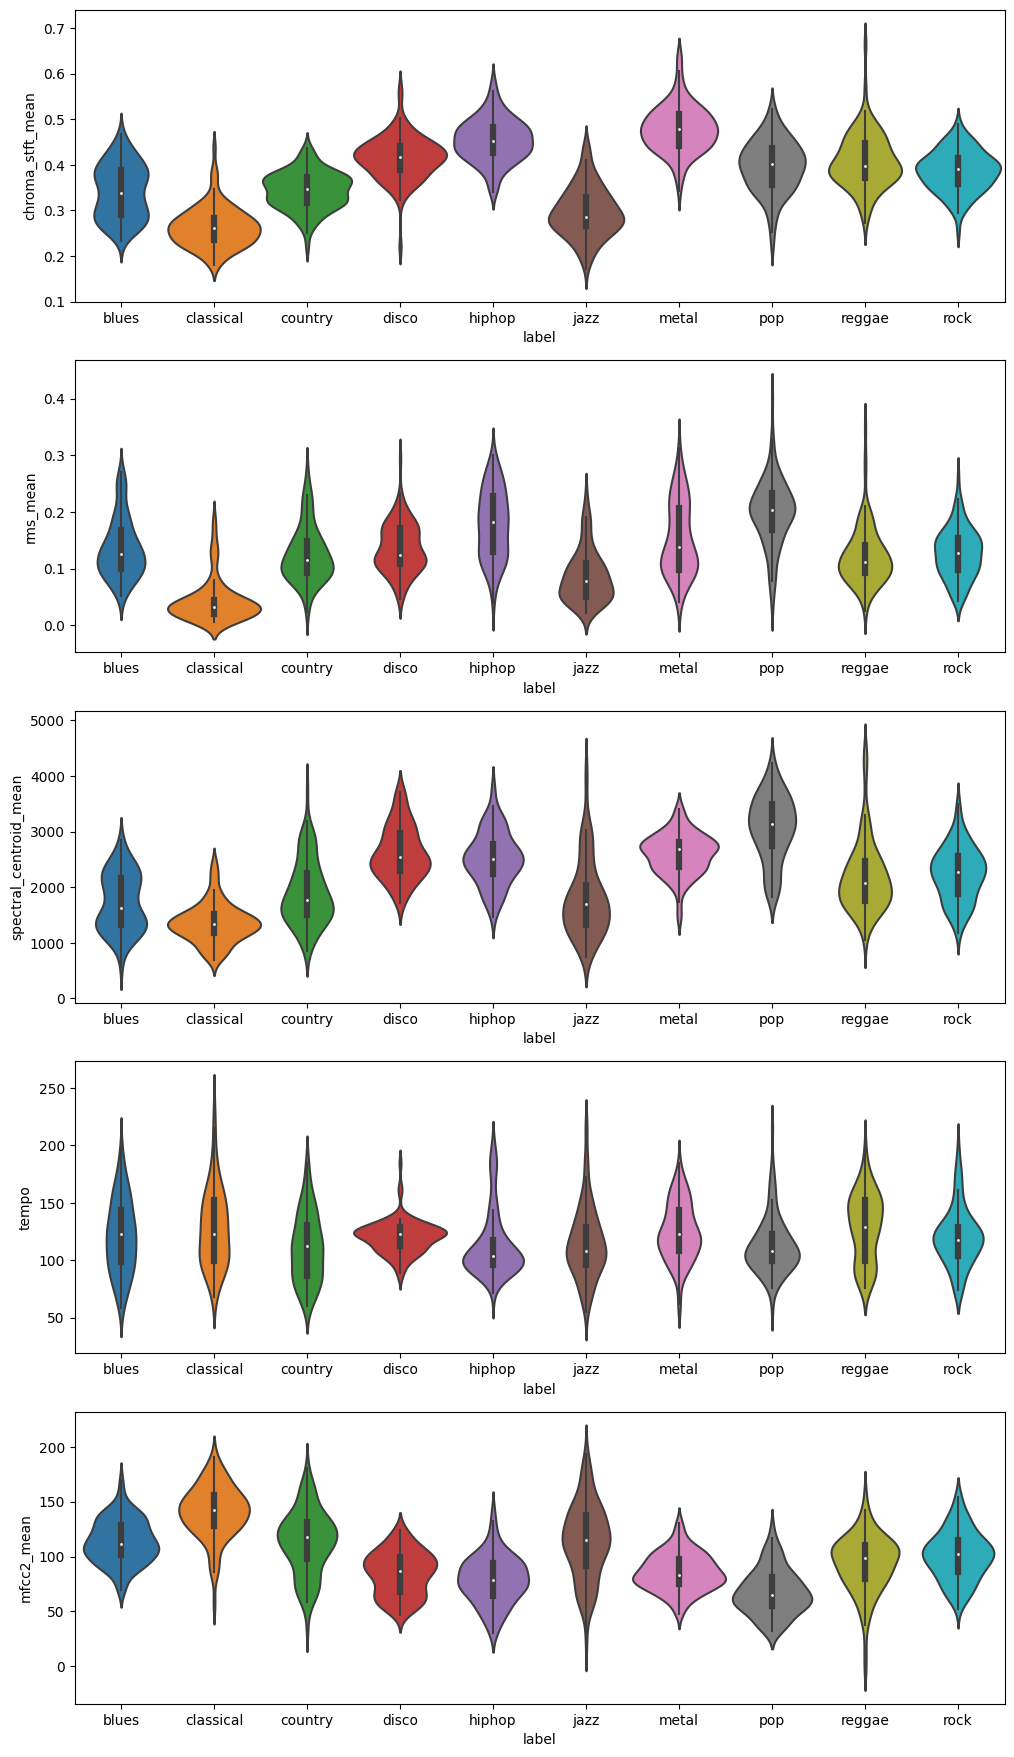

In [49]:
n_plots = len(features_to_observe)

fig, axs = plt.subplots(n_plots, 1, figsize=(12, 2 + n_plots * 4))
axs = axs.flatten()

for k, var in enumerate(features_to_observe):
    sns.violinplot(data=full_data, x="label", y=var, ax=axs[k], legend=False, width=1.0)

### Visualizing the hand-crafted feature space
In order to represent how the audio files are distributed in the feature space derived from these features, we can try performing dimensionality reduction down to perceivable 2D or 3D projections. To achieve this, we can perform PCA or manifold techniques such as t-SNE.

In [50]:
from mpl_toolkits.mplot3d import Axes3D

#### PCA

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

##### PCA on the full audio clips dataset

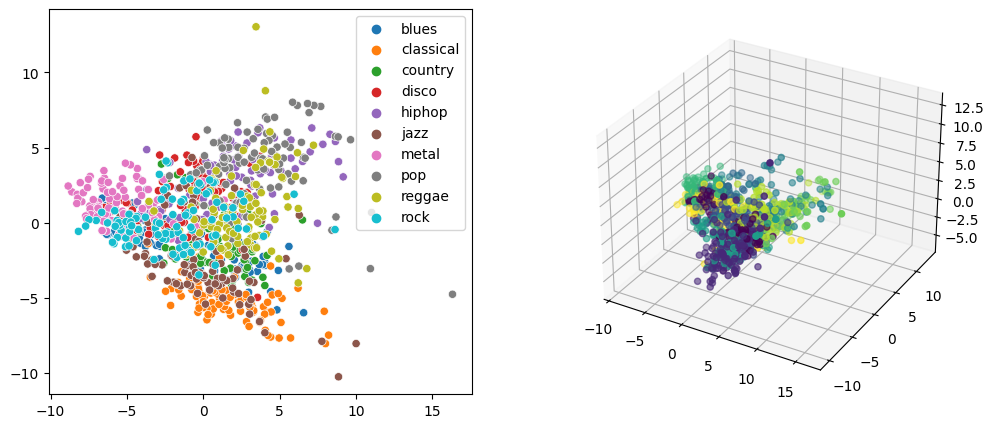

In [65]:
pca = PCA()
pca_full = pca.fit_transform(StandardScaler().fit_transform(full_np))
#pca_full = pca.fit_transform(MinMaxScaler().fit_transform(full_np))

fig = plt.figure(figsize=(12, 5))

pca_2D_ax = fig.add_subplot(121)
pca_3D_ax = fig.add_subplot(122, projection='3d')

sns.scatterplot(x=pca_full[:,0], y=pca_full[:,1], hue=full_labels, ax=pca_2D_ax)
pca_3D_ax.scatter(pca_full[:,0], pca_full[:,1], pca_full[:,2], c=encoded_full_labels)

plt.show()

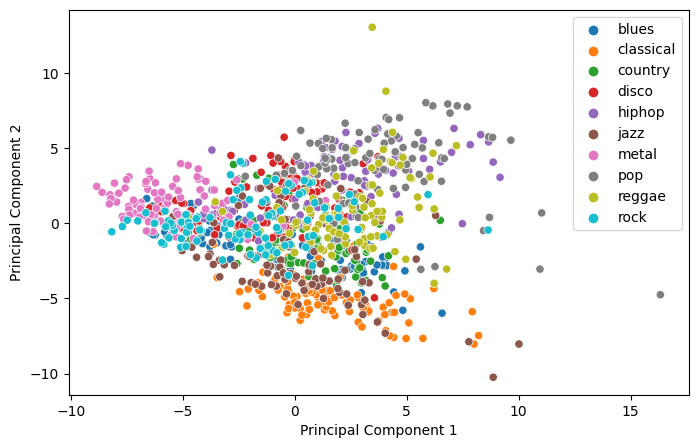

In [66]:
fig = plt.figure(figsize=(8, 5))
pca_2D_ax = fig.add_subplot(111)
sns.scatterplot(x=pca_full[:,0], y=pca_full[:,1], hue=full_labels, ax=pca_2D_ax)
plt.xlabel("Principal Component 1", fontsize = 10)
plt.ylabel("Principal Component 2", fontsize = 10)
plt.show()

In [67]:
contributions = pca.components_
for component in range(3):
    print("Component %d" % (component + 1))
    sorted_contributions = np.argsort(np.abs(contributions[component]))[::-1]
    var_contributions = contributions[component, sorted_contributions]
    for var in range(8):
        idx = sorted_contributions[var]
        contrib = var_contributions[var]
        name = full_data.columns[idx + 2]
        print(f"{name}: {contrib}")

Component 1
mfcc2_var: 0.18047643969053406
chroma_stft_var: 0.17857272971235755
mfcc8_var: 0.17472782042616852
mfcc9_var: 0.17259682505061014
mfcc10_var: 0.17139915429114896
mfcc6_var: 0.16668638082545567
rolloff_var: 0.16417254924688254
mfcc13_var: 0.16405884247497785
Component 2
rolloff_mean: 0.2794121143810269
spectral_bandwidth_mean: 0.2785642434732695
spectral_centroid_mean: 0.2740651682092773
mfcc2_mean: -0.264766537119009
mfcc1_mean: 0.2467732971984841
chroma_stft_mean: 0.24462160790896323
rms_mean: 0.23104773119694524
perceptr_var: 0.2278655820883356
Component 3
mfcc10_mean: 0.2565198400212333
mfcc8_mean: 0.23776726953936778
mfcc12_mean: 0.22613290196954522
mfcc14_mean: 0.21499267337272876
mfcc6_mean: 0.2115347786781306
mfcc18_mean: 0.19098610505030572
mfcc7_var: 0.18979991231511606
mfcc16_mean: 0.18960657515091928


In [68]:
print(
    "The first 3 principal components respectively account for",
    *[str(round(var*100, 4)) + "%," for var in pca.explained_variance_ratio_[:3]],
    f"of the total variance of the dataset, summing up to {round(np.sum(pca.explained_variance_ratio_[:3]) * 100, 4)}%.",
)

The first 3 principal components respectively account for 23.9496%, 16.9292%, 10.75%, of the total variance of the dataset, summing up to 51.6288%.


The MFCC coefficients seem to play a leading role in the variance as well.

Text(0.5, 1.0, 'explained variance')

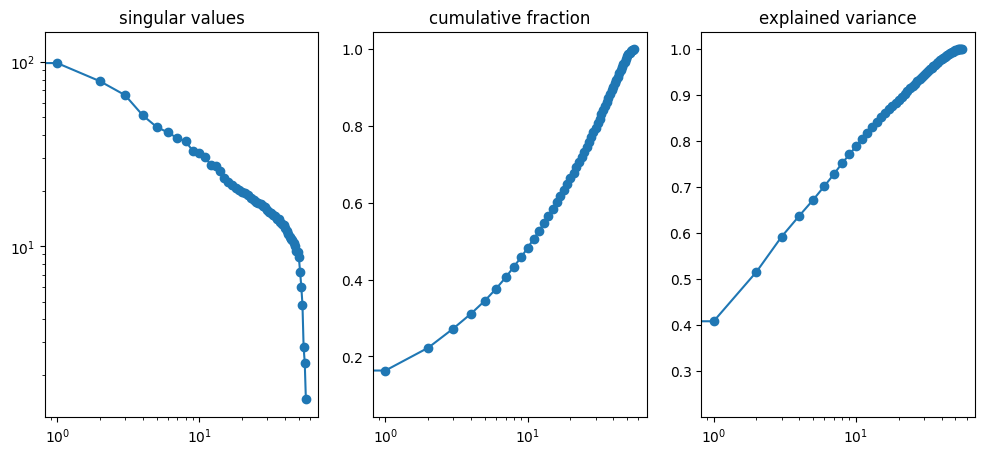

In [70]:
s = pca.singular_values_

fig, axs = plt.subplots(1,3, figsize = (12,5))
axs[0].loglog(s, 'o-')
axs[0].set_title('singular values')

axs[1].semilogx(np.cumsum(s) / np.sum(s), 'o-')
axs[1].set_title('cumulative fraction')

axs[2].semilogx(np.cumsum(s**2) / np.sum(s**2), 'o-')
axs[2].set_title('explained variance')

##### PCA on the 3sec audio clips dataset

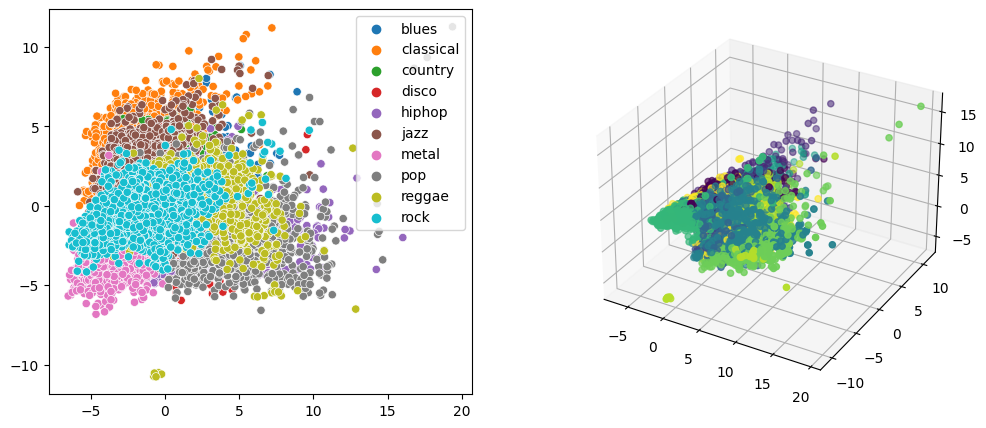

In [56]:
pca = PCA(n_components=3)
pca_3sec = pca.fit_transform(StandardScaler().fit_transform(sec3_np))

fig = plt.figure(figsize=(12, 5))

pca_2D_ax = fig.add_subplot(121)
pca_3D_ax = fig.add_subplot(122, projection='3d')

sns.scatterplot(x=pca_3sec[:,0], y=pca_3sec[:,1], hue=sec3_labels, ax=pca_2D_ax)
pca_3D_ax.scatter(pca_3sec[:,0], pca_3sec[:,1], pca_3sec[:,2], c=encoded_sec3_labels)

plt.show()

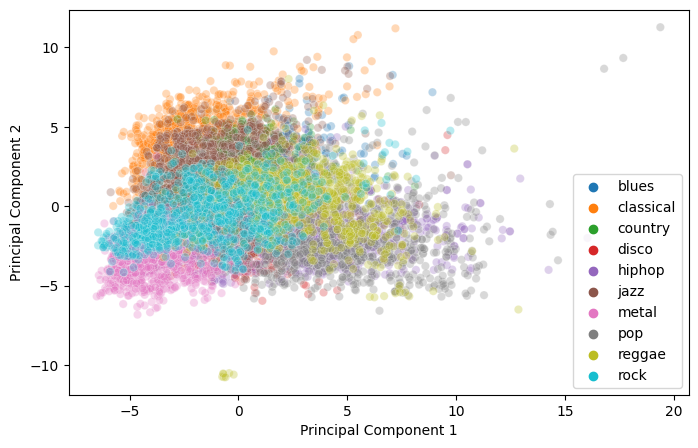

In [57]:
fig = plt.figure(figsize=(8, 5))
pca_2D_ax = fig.add_subplot(111)
sns.scatterplot(x=pca_3sec[:,0], y=pca_3sec[:,1], hue=sec3_labels, ax=pca_2D_ax, alpha=0.3)
plt.xlabel("Principal Component 1", fontsize = 10)
plt.ylabel("Principal Component 2", fontsize = 10)
plt.show()

#### t-SNE

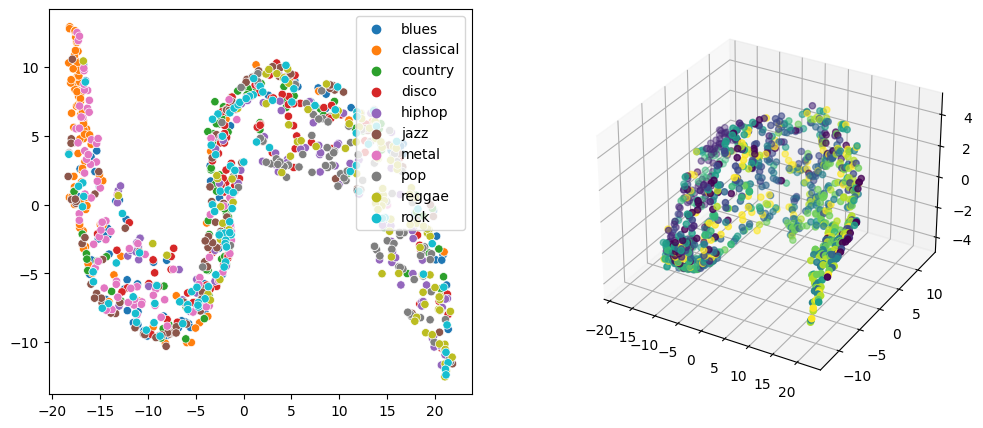

In [58]:
from sklearn.manifold import TSNE

tsne_full = TSNE(n_components=3).fit_transform(full_np)

fig = plt.figure(figsize=(12, 5))

ax_2D = fig.add_subplot(121)
ax_3D = fig.add_subplot(122, projection='3d')


sns.scatterplot(x=tsne_full[:,0], y=tsne_full[:,1], hue=full_labels, ax=ax_2D)
ax_3D.scatter(tsne_full[:,0], tsne_full[:,1], tsne_full[:,2], c=encoded_full_labels)

plt.show()

The t-SNE approach also fails to show effective natural separation between classes.

## Introducing the spectrogram visualization towards CNNs

Although the dataset we use already feature spectrogram representations of the audio files, we decided to build them ourselves for several reasons.

1. The spectrograms have been compressed into images files, zipped, uploaded on Kaggle, downloaded, unzipped... In order to be certain that we get the pixel-wise exact 2D-matrix corresponding to the audio's spectrogram, it is safer to compute it ourselves.
2. For some reason, the spectrogram images in the dataset have a white border around them, i.e. would require preprocessing to get rid of, anyways.
3. The method for building the spectrograms is interesting and is relevant to study in the context of the course, as the FFT and its history was studied in the course.

### How the spectrogram is derived from the audio file

https://it.mathworks.com/help/signal/ref/spectrogram.html#bultmx7_sep_mw_c056db1e-cade-47af-bf56-37cd76eee5db

#### Represent the feature space derived from the spectrogram
Does the raw data (as a spectrogram) naturally includes significant difference between music genres ?

Flatten the spectrogram matrix and use that a feature vector, apply PCA on it.
and/or consider each spectrogram as a sequence of FFTs, and represent each music extract as the centroid of its corresponding PCA-projected FFT vectors.